# Environnement

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

# Import data

## Zones

In [186]:
gdf_za = gpd.read_file('data/CCSL/deveco.za.shp')
gdf_za = gdf_za[['za_id', 'za_commune', 'za_nom', 'geometry']]
gdf_za = gdf_za[gdf_za['za_nom'].isin(['ZA LES RAGONNIERES', 'ZA LES ROITELIERES', 'ZA LES PETITS PRIMEAUX'])]
gdf_za['centroid'] = gdf_za['geometry'].centroid
gdf_za['lon'] = gdf_za.centroid.x
gdf_za['lat'] = gdf_za.centroid.y
gdf_za

,za_id,za_commune,za_nom,geometry,centroid,lon,lat
0,3,44032,ZA LES RAGONNIERES,"POLYGON ((370193.990 6683581.190, 370174.930 6...",POINT (370195.631 6683699.998),370195.630969,6.683700e+06
16,7,44117,ZA LES ROITELIERES,"POLYGON ((370991.379 6681651.920, 370990.427 6...",POINT (370684.096 6681362.453),370684.096206,6.681362e+06
22,8,44117,ZA LES PETITS PRIMEAUX,"POLYGON ((369241.401 6681765.420, 369249.382 6...",POINT (369456.791 6681516.129),369456.790676,6.681516e+06


In [187]:
poly_rag = gdf_za[gdf_za['za_nom'] == 'ZA LES RAGONNIERES']['geometry'].iloc[0]
poly_roi = gdf_za[gdf_za['za_nom'] == 'ZA LES ROITELIERES']['geometry'].iloc[0]
poly_pet = gdf_za[gdf_za['za_nom'] == 'ZA LES PETITS PRIMEAUX']['geometry'].iloc[0]

polys = gpd.GeoSeries({
    'rag': poly_rag,
    'roi': poly_roi,
    'pet': poly_pet
})

## Batiment de production

In [195]:
gdf_prod = gpd.read_file('data/site_de_production/sites_production_sup_100kw_2154.shp')

gdf_prod['centroid'] = gdf_prod['geometry'].centroid
gdf_prod = gdf_prod.assign(**{key: gdf_prod['centroid'].within(geom) for key, geom in polys.items()})
gdf_prod

,fid,id_bat,epci,code_epci,commune,code_comm,nom_iris,code_iris,src_bat,id_bdtopo,...,puiss_pv,eco_ges,class_puis,layer,path,geometry,centroid,rag,roi,pet
0,651.0,BAT_SYDELA_516742,CC SEVRE ET LOIRE,CC_SL,DIVATTE-SUR-LOIRE,44029,LES COTEAUX,440290102,None,BATIMENT0000000309703482,...,132.63,693.7991,5,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((371777.401 6693592.100, 371799.601 6...",POINT (371784.064 6693570.346),False,False,False
1,3192.0,BAT_SYDELA_516121,CC SEVRE ET LOIRE,CC_SL,MOUZILLON,44108,MOUZILLON,0,None,BATIMENT0000000309702154,...,109.80,641.9316,5,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((375619.173 6679606.739, 375618.334 6...",POINT (375613.623 6679620.299),False,False,False
2,7908.0,BAT_SYDELA_480297,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LA VALLEE,441690102,None,BATIMENT0000002011314593,...,163.10,831.4568,6,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((368279.992 6694661.854, 368279.900 6...",POINT (368291.170 6694686.131),False,False,False
3,14549.0,BAT_SYDELA_483161,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LA VALLEE,441690102,None,BATIMENT0000000308879859,...,395.57,1998.7974,7,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((368335.953 6694650.597, 368335.800 6...",POINT (368349.715 6694685.794),False,False,False
4,14811.0,BAT_SYDELA_478920,CC SEVRE ET LOIRE,CC_SL,LE LOROUX-BOTTEREAU,44084,LE LOROUX-BOTTEREAU,0,None,BATIMENT0000000309701277,...,150.09,845.1422,6,Batiments agricoles,E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((375114.100 6691960.300, 375111.500 6...",POINT (375092.491 6691949.861),False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,207293.0,BAT_SYDELA_489195,CC SEVRE ET LOIRE,CC_SL,DIVATTE-SUR-LOIRE,44029,LES COTEAUX,440290102,None,BATIMENT0000000308879479,...,117.58,678.2641,5,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((373411.361 6697255.167, 373410.799 6...",POINT (373444.649 6697281.422),False,False,False
592,209682.0,BAT_SYDELA_480142,CC SEVRE ET LOIRE,CC_SL,DIVATTE-SUR-LOIRE,44029,LA VALLEE,440290101,None,BATIMENT0000000309664024,...,215.39,1114.9020,6,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((368532.031 6694993.396, 368532.400 6...",POINT (368487.564 6695055.576),False,False,False
593,213352.0,BAT_SYDELA_480998,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LA VALLEE,441690102,None,BATIMENT0000002011319890,...,904.87,4437.3573,8,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((363355.230 6691550.840, 363346.500 6...",POINT (363365.700 6691616.047),False,False,False
594,222567.0,BAT_SYDELA_1109161,CC SEVRE ET LOIRE,CC_SL,SAINT-JULIEN-DE-CONCELLES,44169,LES CHAMPS,441690103,None,None,...,182.18,956.7445,6,Indeterminés (dont serres agricoles),E:/MEDAS/données massives spatialisées/SYDELA/...,"POLYGON ((366936.703 6692039.264, 366939.680 6...",POINT (366913.549 6692032.674),False,False,False


## Batiment de consommation

In [497]:
gdf_conso_annuelle = gpd.read_file('data/conso_bati_annuelle/vdef_conso_bati_public.shp')
gdf_conso_annuelle

,ID de la z,Nom de l'o,Nom de l'E,Année,Nom de la,Usage,Actvité p,Année de,Décret Ec,Surface to,Energie de,Consommati,Conso surf,Comptage h,Consomma_1,new_name,geometry
0,44-BOI-001 - 44-BOI-001-001 - AGENCE POSTALE,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,AGENCE POSTALE,"Autres services (maison de services au public,...",Autres services administratifs (hors services ...,None,None,NaN,None,2.506658,NaN,Oui,None,Service public et administratif Autre service ...,POINT (380815.528 6689852.629)
1,44-BOI-002 - 44-BOI-002-001 - ATELIER MUNICIPAL,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,BIBLIOTHEQUE,Ateliers/centres techniques municipaux/serres ...,Batiments techniques communaux (hors services),None,None,NaN,None,23.991839,NaN,Oui,None,Service public et administratif Autre service ...,POINT (381051.660 6689700.865)
2,44-BOI-003 - 44-BOI-003-001 - ATELIER TECHNIQUE,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,ATELIER TECHNIQUE,Ateliers/centres techniques municipaux/serres ...,Batiments techniques communaux (hors services),None,None,NaN,None,5.312562,NaN,Oui,None,Service public et administratif Autre service ...,POINT (381079.157 6690140.795)
3,44-BOI-004 - 44-BOI-004-001 - MAIRIE,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,MAIRIE,"Services administratifs communaux (mairie, mai...",Bâtiments administratifs communaux (services),None,None,NaN,None,4.365427,NaN,Oui,None,Service public et administratif Administration...,POINT (381006.641 6689803.252)
4,44-BOI-005 - 44-BOI-005-001 - SALLE BUXERIA,LA-BOISSIERE-DU-DORE,COMMUNAUTE DE COMMUNES SEVRE ET LOIRE,2019.0,SALLE BUXERIA,"Locaux communaux (local, foyer des jeunes, loc...",Equipements socio-culturels,None,None,NaN,None,15.322747,NaN,Oui,None,Socio-culturel Autre équipement socio-culturel,POINT (380980.908 6689950.849)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)
995,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)
996,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)
997,None,None,None,NaN,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,POINT (253531.131 909838.931)


## Note opérateur

In [492]:
df_note = pd.read_excel('data/SYDELA/4- 20220925_Typologie-note-elec_EBO.xlsx', sheet_name='TYPOLOGIE BATI VF', header=1)
df_note = df_note.fillna(method='ffill')

In [493]:
df_note['new_name'] = list(df_note['Usage'] +  ' ' + df_note['Détail'])

In [498]:
gdf_conso_annuelle = gdf_conso_annuelle.merge(df_note, how='left', on='new_name')
gdf_conso_annuelle = gdf_conso_annuelle[['ID de la z', "Nom de l'o", 'Nom de la', 'Actvité p', 'Consommati', 'geometry', 'Note de compatibilité profil électrique ACC (1-10)']]
gdf_conso_annuelle.columns = ['id', 'nom_ville', 'nom_bati', 'activite', 'conso_annuelle', 'point', 'note']

# Calcul

In [746]:
rayon_circle = 1000
resolution = 2
n_circle = 2
n_point_on_circle = 4 * resolution
angle_to_turn = 180 / n_point_on_circle

In [553]:
list_zone = ['rag', 'roi', 'pet']

In [460]:
gdf_prod_zone = gdf_prod[gdf_prod['rag'] == True]

In [551]:
for index, bati in gdf_prod_zone.iterrows():
    print(bati)

fid                                                     1543.0
id_bat                                       BAT_SYDELA_502706
epci                                         CC SEVRE ET LOIRE
code_epci                                                CC_SL
commune                                     LA CHAPELLE-HEULIN
                                   ...                        
geometry     POLYGON ((370043.7995674254 6683708.299300967,...
centroid           POINT (370059.7774426505 6683707.790959462)
rag                                                       True
roi                                                      False
pet                                                      False
Name: 20, Length: 99, dtype: object
fid                                                    10606.0
id_bat                                       BAT_SYDELA_502734
epci                                         CC SEVRE ET LOIRE
code_epci                                                CC_SL
commune            

In [461]:
bati = gdf_prod_zone.iloc[0]

In [470]:
first_circle = bati['centroid'].buffer(rayon_circle, resolution)

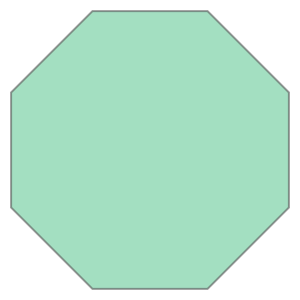

In [717]:
gpd.GeoSeries(first_circle).rotate(angle_to_turn)[0]

In [473]:
def get_all_circle_from_a_circle(origin_circle):
    list_coordinate_circle = list(set(list(origin_circle.exterior.coords)))
    list_center_circle = [Point(lat_lon) for lat_lon in list_coordinate_circle]
    list_circle = [center_circle.buffer(rayon_circle) for center_circle in list_center_circle]
    return list_circle

In [506]:
list_circle = get_all_circle_from_a_circle(first_circle)
list_circle.insert(0, first_circle)

In [516]:
prod_bati = bati['pot_pv'] / 1000

In [585]:
dict_zone = {}

for idx, circle in enumerate(list_circle):
    dict_zone[str(idx+1)] = {}

    gdf_conso_annuelle_zone = gdf_conso_annuelle[gdf_conso_annuelle['point'].within(circle)]
    gdf_conso_annuelle_zone_sort = gdf_conso_annuelle_zone.sort_values(by='note', ascending=False)
    gdf_conso_annuelle_zone_sort['conso_cum'] = gdf_conso_annuelle_zone_sort['conso_annuelle'].cumsum()
    gdf_conso_annuelle_zone_sort = gdf_conso_annuelle_zone_sort[gdf_conso_annuelle_zone_sort['conso_cum'] < prod_bati]

    gdf_zone_agg = gdf_conso_annuelle_zone_sort.groupby(lambda x: True).agg(
        conso_total = ('conso_annuelle', 'sum'),
        note_moy = ('note', 'mean'),
    ).reset_index(drop=True)

    gdf_zone_agg['prod_bati'] = prod_bati
    gdf_zone_agg['circle'] = circle
    dict_zone[str(idx+1)]['gdf_zone'] = gdf_zone_agg

dict_zone['2']['gdf_zone']

,id,nom_ville,nom_bati,activite,conso_annuelle,point,note,conso_cum


In [747]:
rayon_circle = 1000
resolution = 2
n_crown = 2
n_point_on_circle = 4 * resolution
angle_to_turn = 180 / n_point_on_circle

list_distance_crown = list(np.arange(0, rayon_circle, rayon_circle/n_crown)[1:])
list_distance_crown.append(rayon_circle)
list_distance_crown = list(reversed(list_distance_crown))

In [767]:
dict_data = {}
df_final = []

for zone in list_zone:
    dict_data[zone] = {}
    gdf_prod_zone = gdf_prod[gdf_prod[zone] == True]

    for index, bati in gdf_prod_zone.iterrows():
        id_bat = bati['id_bat']
        dict_data[zone][id_bat] = {}

        list_circle = []
        for idx_crown, distance_crown in enumerate(list_distance_crown):
            crown = bati['centroid'].buffer(distance_crown, resolution)

            if (idx_crown % 2) == 0:
                crown = gpd.GeoSeries(crown).rotate(angle_to_turn)[0]

            list_circle_crown = get_all_circle_from_a_circle(crown)
            list_circle.extend(list_circle_crown)
        first_circle = bati['centroid'].buffer(rayon_circle)
        list_circle.insert(0, first_circle)


        for idx, circle in enumerate(list_circle):
            dict_zone[str(idx+1)] = {}

            gdf_conso_annuelle_zone = gdf_conso_annuelle[gdf_conso_annuelle['point'].within(circle)]
            gdf_conso_annuelle_zone_sort = gdf_conso_annuelle_zone.sort_values(by='note', ascending=False)
            gdf_conso_annuelle_zone_sort['conso_cum'] = gdf_conso_annuelle_zone_sort['conso_annuelle'].cumsum()
            gdf_conso_annuelle_zone_sort = gdf_conso_annuelle_zone_sort[gdf_conso_annuelle_zone_sort['conso_cum'] < prod_bati]

            gdf_zone_agg = gdf_conso_annuelle_zone_sort.groupby(lambda x: True).agg(
                conso_total = ('conso_annuelle', 'sum'),
                note_moy = ('note', 'mean'),
            ).reset_index(drop=True)

            if gdf_zone_agg.shape[0] == 0:
                gdf_zone_agg = pd.DataFrame(data=[[0, 0]], columns=['conso_total', 'note_moy'])

            gdf_zone_agg['zone'] = zone
            gdf_zone_agg['id_bat'] = id_bat
            # gdf_zone_agg['point_bat_prod'] = bati['centroid']
            gdf_zone_agg['prod_bati'] = bati['pot_pv'] / 1000
            gdf_zone_agg['circle_polygon'] = circle

            dict_data[zone][id_bat]['gdf_agg'] = gdf_zone_agg
            df_final.append(gdf_zone_agg)

In [768]:
df_final = pd.concat(df_final)
df_final

,conso_total,note_moy,zone,id_bat,prod_bati,circle_polygon
0,0.000000,0.00,rag,BAT_SYDELA_502706,181.877,"POLYGON ((371059.7774426505 6683707.790959462,..."
0,99.712198,3.25,rag,BAT_SYDELA_502706,181.877,POLYGON ((371442.46087501524 6684631.670491972...
0,0.170773,2.00,rag,BAT_SYDELA_502706,181.877,"POLYGON ((370677.0940102851 6684631.670491973,..."
0,153.800683,3.75,rag,BAT_SYDELA_502706,181.877,POLYGON ((371983.65697516175 6684090.474391826...
0,0.000000,0.00,rag,BAT_SYDELA_502706,181.877,"POLYGON ((370677.0940102851 6682783.91142695, ..."
...,...,...,...,...,...,...
0,0.000000,0.00,pet,BAT_SYDELA_501421,126.029,"POLYGON ((370569.7730894634 6681893.133754005,..."
0,0.000000,0.00,pet,BAT_SYDELA_501421,126.029,"POLYGON ((370569.7730894634 6680893.133754005,..."
0,0.000000,0.00,pet,BAT_SYDELA_501421,126.029,"POLYGON ((370923.3264800567 6681039.580363411,..."
0,0.000000,0.00,pet,BAT_SYDELA_501421,126.029,"POLYGON ((370923.3264800567 6681746.687144598,..."


In [769]:
gdf_final = gpd.GeoDataFrame(df_final, geometry='circle_polygon')

In [770]:
gdf_final.to_file(filename='circle_polygon_res_2_crown_2.shp.zip', driver='ESRI Shapefile')

C:\Users\flore\AppData\Local\Temp\ipykernel_12248\912015933.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_final.to_file(filename='circle_polygon_res_2_crown_2.shp.zip', driver='ESRI Shapefile')
